In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
rf = importlib.import_module("random-forests")
mushroom = np.loadtxt("agaricus-lepiota.data", dtype=str, delimiter=",")
wine = np.loadtxt("wine.data", delimiter=",")
iris = np.loadtxt("iris_csv.csv", dtype=str, delimiter=",")
heart = np.loadtxt("processed.cleveland.data", dtype=str, delimiter=",")





Clean data by removing entries with missing values denoted "?" and separate into data and labels

In [17]:
def str_in_arr(arr, str):
    return not np.isin(str, arr)

In [18]:
barr_mushroom = np.apply_along_axis(str_in_arr, 1, mushroom, "?")
mushroom = mushroom[barr_mushroom, :]
barr_heart = np.apply_along_axis(str_in_arr, 1, heart, "?")
heart = heart[barr_heart, :]

In [19]:
heart = heart.astype(float)

In [20]:
iris_data = iris[1:, :4].astype(float)
iris_labels = iris[1:, 4]

In [21]:
wine_data = wine[:, 1:]
wine_labels = wine[:, 0].astype(int)

In [22]:
heart_data = heart[:, :-1]
heart_labels = heart[:, -1].astype(int)
# Turn heart_labels into array of 0, 1.
# 1 indicates presence of any type of heart disease, 0 indicates no presence
heart_labels_barr = heart_labels >= 1
heart_labels[heart_labels_barr] = 1

In [23]:
mushroom_data = mushroom[:, 1:]
mushroom_labels = mushroom[:, 0]

In [24]:
misclass_rate = rf.random_forests.misclassification_rate

In [25]:
# Split into test and train samples
# For wine
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(
    wine_data, wine_labels, stratify=wine_labels)
# For heart
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(
    heart_data, heart_labels, stratify=heart_labels)
# For mushrooms
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(
    mushroom_data, mushroom_labels, stratify=mushroom_labels)
# For iris
X_i_train, X_i_test, y_i_train, y_i_test = train_test_split(
    iris_data, iris_labels, stratify=iris_labels)

In [26]:
heart_ftype = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
rf_heart = rf.RandomForest(n_trees=100, n_candidates=30, max_depth=10)
rf_heart.fit(X_h_train, y_h_train, feature_type=heart_ftype, m_features=4)

In [27]:
misclass_rate(rf_heart.predict(X_h_test), y_h_test)

0.24

In [28]:
rf_wine = rf.RandomForest(n_trees=100, n_candidates=10, max_depth=1)
rf_wine.fit(X_w_train, y_w_train, feature_type="continuous", m_features=3)

In [29]:
misclass_rate(rf_wine.predict(X_w_test), y_w_test)

0.6

In [30]:
# Create an example plot for n_trees = 1-10 with error bars
ntrees = np.arange(1, 11)
# number of experiments to run for each parameter choice
nexp = 10
datasets = {"iris": (X_i_train, X_i_test, y_i_train, y_i_test, "continuous"),
            "mushroom": (X_m_train, X_m_test, y_m_train, y_m_test, "categorical"),
            "heart": (X_h_train, X_h_test, y_h_train, y_h_test, heart_ftype),
            "wine": (X_w_train, X_w_test, y_w_train, y_w_test, "continuous")}
results = {}
for dataset in datasets.keys():
    X_train, X_test, y_train, y_test, ftype= datasets[dataset]
    result = np.empty((len(ntrees), nexp), dtype=float)
    for i, ntree in enumerate(ntrees):
        for j in range(nexp):
            random_forest = rf.RandomForest(n_trees=10, n_candidates=10, max_depth=ntree)
            random_forest.fit(X_train, y_train, feature_type=ftype, m_features=2)
            result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
    results[dataset] = result


In [31]:
import pickle
po = open("results_test_plots2.pickle", "wb")
pickle.dump(results, po)
po.close()

In [32]:
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])

In [33]:
mean_sd = {}
for dataset in results.keys():
    mean_sd[dataset] = np.apply_along_axis(comp_mean_sd, 1, results[dataset])

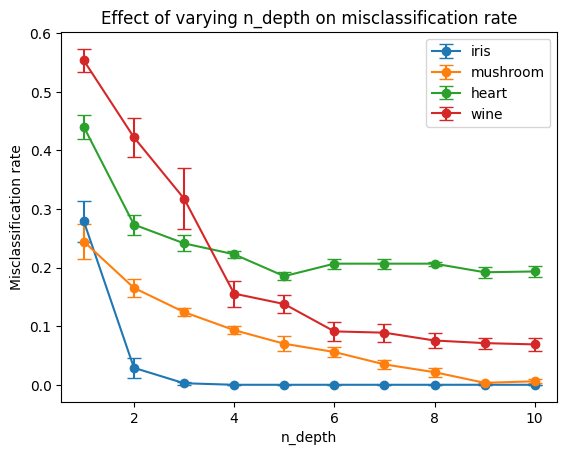

In [35]:
for dataset, m_sd in mean_sd.items():
    plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o-")
plt.xlabel("n_depth")
plt.ylabel("Misclassification rate")
plt.title("Effect of varying n_depth on misclassification rate")
plt.legend()

In [115]:
aaa = []
for x in np.unique(iris_labels):    
    aaa.append(np.count_nonzero(y_i_train[(X_i_train[:, 0] >= 5.8) & (X_i_train[:, 2] >= 5.1)] == x))
aaa, np.unique(iris_labels)

([0, 1, 28],
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15'))